In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import gzip
import cooltools
import cooler
import matplotlib.pyplot as plt
import glob
import warnings
import bioframe
import csv
warnings.filterwarnings("ignore")

In [3]:
#merge = cooler.Cooler('/data/manke/group2/deboutte/projects/xescape/uC/nmask/merge/NH_merge.4000.mcool::resolutions/100000')
#merge = cooler.Cooler('/data/processing2/erikson_pipegrp/methylation/chr1.balanced.cool')
merge = cooler.Cooler('/data/processing2/erikson_pipegrp/methylation/chr1.normRnage0_1.cool')
bins = merge.bins()[:]
#mm39_genome = bioframe.load_fasta('/data/repository/organisms/GRCm39_ensembl_106/genome_fasta/genome.fa')
mm38_genome = bioframe.load_fasta('/data/repository/organisms/GRCm38_ensembl/genome_fasta/genome.fa')
gc_cov = bioframe.frac_gc(bins[['chrom', 'start', 'end']], mm38_genome)

In [4]:
gc_cov.head()

chrom   start     end  GC
0     1       0   80000 NaN
1     1   80000  160000 NaN
2     1  160000  240000 NaN
3     1  240000  320000 NaN
4     1  320000  400000 NaN

In [5]:
view_df = pd.DataFrame(
    {
        'chrom': merge.chromnames,
        'start': 0,
        'end': merge.chromsizes.values,
        'name': merge.chromnames
    }
)
view_df.head()

chrom  start        end name
0     1      0  195471971    1
1    10      0  130694993   10
2    11      0  122082543   11
3    12      0  120129022   12
4    13      0  120421639   13

In [6]:
cis_eigs = cooltools.eigs_cis(
    merge,
    gc_cov,
    view_df,
    n_eigs=3
)
eigenvector_track = cis_eigs[1][['chrom','start','end','E1']]

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

# Load methylation data from BED file
# Assuming the BED file has columns: chrom, start, end, methylation_value
methylation_data = pd.read_csv('/data/processing2/erikson_pipegrp/methylation/modkit/23L004743_CaBl_Ori_NPCs_Control_rep2.callmods.pileup.scores.chr1.bed', sep='\t', header=None, names=['chrom', 'start', 'end', 'methylation_value'])

# Extract methylation values for the region of interest
# Adjust the filtering according to your specific requirements
#methylation_values = methylation_data[methylation_data['chrom'] == '1']['methylation_value'].values
methylation_values = methylation_data['methylation_value']

methylation_data['methylation_value']

0          2
1          2
2          3
3          3
4          3
          ..
4454761    1
4454762    1
4454763    1
4454764    1
4454765    1
Name: methylation_value, Length: 4454766, dtype: int64

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

# Load methylation data from BED file
# Assuming the BED file has columns: chrom, start, end, methylation_value
methylation_data = pd.read_csv('/data/processing2/erikson_pipegrp/methylation/modkit/23L004743_CaBl_Ori_NPCs_Control_rep2.callmods.pileup.scores.chr1.bed', sep='\t', header=None, names=['chrom', 'start', 'end', 'methylation_value'])


methylation_data['methylation_value'] = pd.to_numeric(methylation_data['methylation_value'], errors='coerce')

# Now extract the methylation values
methylation_values = methylation_data['methylation_value']

# Apply log transformation, handling NaN values if necessary
log_transformed_values = np.log(methylation_values)

# Assign back to the DataFrame
methylation_data['methylation_value'] = log_transformed_values

# Display the head of the DataFrame
print(methylation_data.head())
# Write to BED file
methylation_data.to_csv('/data/processing2/erikson_pipegrp/methylation/modkit/23L004743_CaBl_Ori_NPCs_Control_rep2.callmods.pileup.scores.chr1.logTransformed.bed', sep='\t', index=False, header=False)


   chrom    start      end  methylation_value
0      1  3000826  3000827           0.693147
1      1  3000826  3000827           0.693147
2      1  3000827  3000828           1.098612
3      1  3000827  3000828           1.098612
4      1  3001006  3001007           1.098612


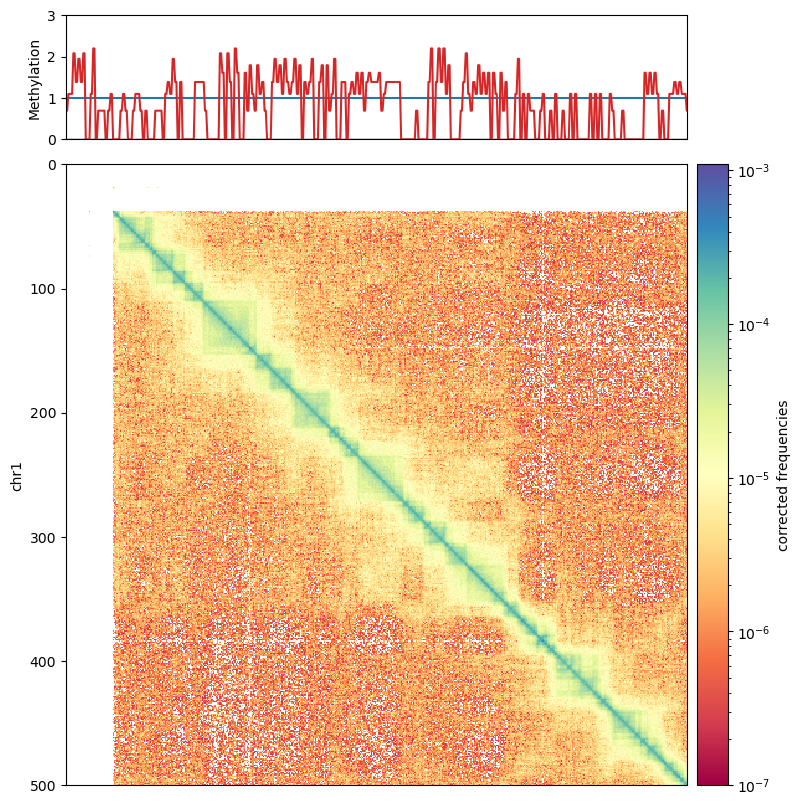

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

#merge = cooler.Cooler('/data/manke/group2/deboutte/projects/xescape/uC/nmask/merge/NH_merge.4000.mcool::resolutions/100000')
#merge = cooler.Cooler('/data/processing2/erikson_pipegrp/methylation/chr1.balanced.cool')
merge = cooler.Cooler('/data/processing2/erikson_pipegrp/methylation/chr1.normRnage0_1.cool')
bins = merge.bins()[:]
#mm39_genome = bioframe.load_fasta('/data/repository/organisms/GRCm39_ensembl_106/genome_fasta/genome.fa')
mm38_genome = bioframe.load_fasta('/data/repository/organisms/GRCm38_ensembl/genome_fasta/genome.fa')
gc_cov = bioframe.frac_gc(bins[['chrom', 'start', 'end']], mm38_genome)

# Load methylation data from BED file
# Assuming the BED file has columns: chrom, start, end, methylation_value
methylation_data = pd.read_csv('/data/processing2/erikson_pipegrp/methylation/modkit/23L004743_CaBl_Ori_NPCs_Control_rep2.callmods.pileup.scores.chr1.bed', sep='\t', header=None, names=['chrom', 'start', 'end', 'methylation_value'])


methylation_data['methylation_value'] = pd.to_numeric(methylation_data['methylation_value'], errors='coerce')

# Now extract the methylation values
methylation_values = methylation_data['methylation_value']

# Apply log transformation, handling NaN values if necessary
log_transformed_values = np.log(methylation_values)

# Assign back to the DataFrame
methylation_data['methylation_value'] = log_transformed_values

f, ax = plt.subplots(figsize=(15, 10))

norm = LogNorm(vmin=1e-7)

im = ax.matshow(
    merge.matrix().fetch('6'),
    norm=norm,
    cmap='Spectral'
)
plt.axis([0, 500, 500, 0])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='corrected frequencies')
ax.set_ylabel('chr1')
ax.xaxis.set_visible(False)

#ax1 = divider.append_axes("top", size="20%", pad=0.25, sharex=ax)

# Align the methylation plot with the heatmap
#x1.plot(range(len(log_transformed_values)), log_transformed_values, label='Methylation')
#ax1.set_ylim(-0, 2)

#ax1.set_ylabel('Methylation')
#ax1.set_xticks([])

ax1 = divider.append_axes("top", size="20%", pad=0.25, sharex=ax)
weights = merge.bins().fetch('3')[:]['weight'].values
ax1.plot([0, 500], [0, 0], 'k', lw=0.25)

# Plot methylation values instead of eigenvector
#ax1.plot(methylation_values, label='Methylation')
ax1.plot(methylation_data, label='Methylation')
ax1.set_ylim(0, 3)

ax1.set_ylabel('Methylation')
ax1.set_xticks([])

#for i in np.where(np.diff((methylation_data['methylation_value'] > 0).astype(int)))[0]:
#    ax.plot([0, 500], [i, i], '#7f7f7f', lw=0.5)
#    ax.plot([i, i], [0, 500], '#7f7f7f', lw=0.5)


f.savefig('QC_compartments_chr1_ge_withInsulationMethylation_v4.png', dpi=300)

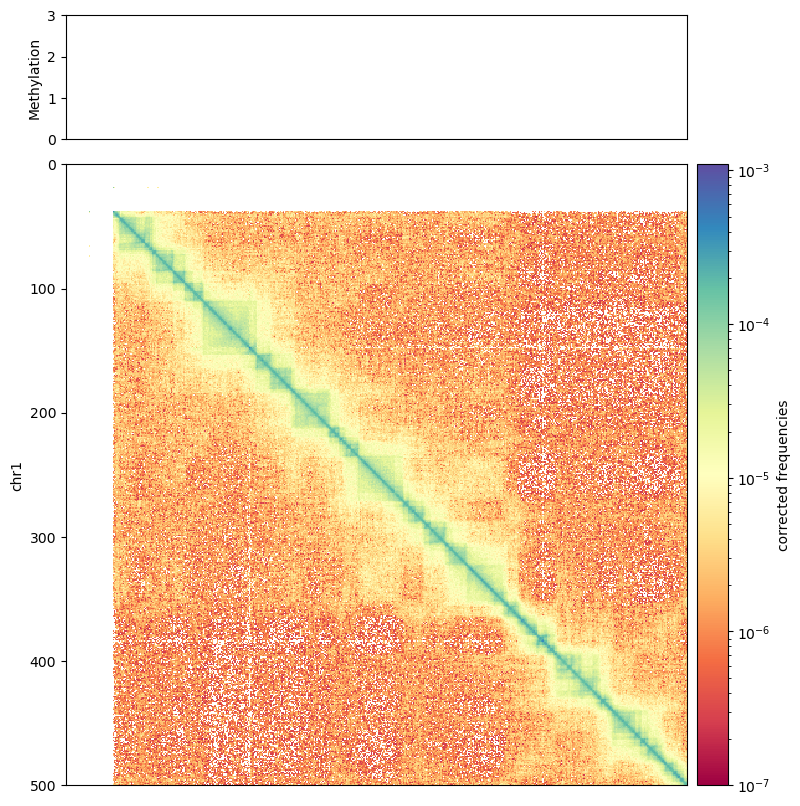

In [27]:
#Methylation data also looks at coordinates:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

# Load methylation data from BED file
methylation_data = pd.read_csv(
    '/data/processing2/erikson_pipegrp/methylation/modkit/23L004743_CaBl_Ori_NPCs_Control_rep2.callmods.pileup.scores.chr1.bed',
    sep='\t', header=None, names=['chrom', 'start', 'end', 'methylation_value']
)

methylation_data['methylation_value'] = pd.to_numeric(methylation_data['methylation_value'], errors='coerce')

# Extract the methylation values
methylation_values = methylation_data['methylation_value']

# Apply log transformation, handling NaN values if necessary
log_transformed_values = np.log(methylation_values)

# Assign back to the DataFrame
methylation_data['methylation_value'] = log_transformed_values

f, ax = plt.subplots(figsize=(15, 10))

norm = LogNorm(vmin=1e-7)

# Assuming 'merge.matrix().fetch('6')' returns a matrix for the heatmap
im = ax.matshow(
    merge.matrix().fetch('6'),
    norm=norm,
    cmap='Spectral'
)
plt.axis([0, 500, 500, 0])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='corrected frequencies')
ax.set_ylabel('chr1')
ax.xaxis.set_visible(False)

ax1 = divider.append_axes("top", size="20%", pad=0.25, sharex=ax)

# Plot methylation values using chromosome coordinates
ax1.plot(methylation_data['start'], methylation_data['methylation_value'], label='Methylation')
ax1.set_ylim(0, 3)
ax1.set_ylabel('Methylation')
ax1.set_xticks([])

# Save the figure
f.savefig('QC_compartments_chr1_ge_withInsulationMethylation_v4.png', dpi=300)

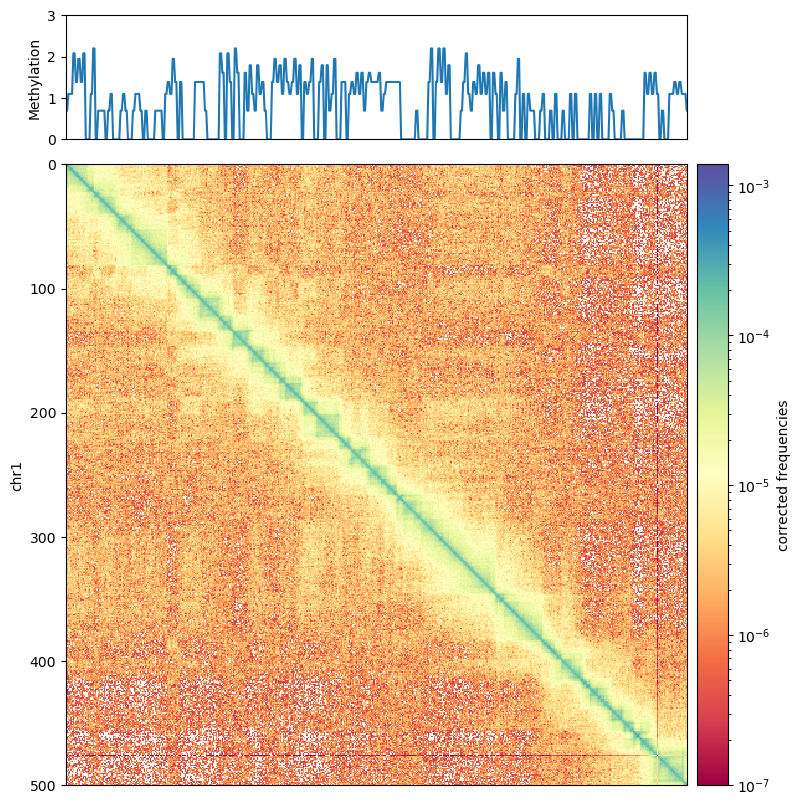

In [31]:
#plotting from position 30000000, till the end
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import cooler
import bioframe

# Load HiC data
merge = cooler.Cooler('/data/processing2/erikson_pipegrp/methylation/chr1.normRnage0_1.cool')
bins = merge.bins()[:]
mm38_genome = bioframe.load_fasta('/data/repository/organisms/GRCm38_ensembl/genome_fasta/genome.fa')
gc_cov = bioframe.frac_gc(bins[['chrom', 'start', 'end']], mm38_genome)

# Load methylation data from BED file
methylation_data = pd.read_csv('/data/processing2/erikson_pipegrp/methylation/modkit/23L004743_CaBl_Ori_NPCs_Control_rep2.callmods.pileup.scores.chr1.bed', sep='\t', header=None, names=['chrom', 'start', 'end', 'methylation_value'])
methylation_data['methylation_value'] = pd.to_numeric(methylation_data['methylation_value'], errors='coerce')

# Filter methylation data to start from position 3000826
methylation_data = methylation_data[methylation_data['start'] >= 3000826]

# Log transform methylation values
log_transformed_values = np.log(methylation_data['methylation_value'])
methylation_data['methylation_value'] = log_transformed_values

# Plotting
f, ax = plt.subplots(figsize=(15, 10))
norm = LogNorm(vmin=1e-7)

# Fetch HiC data starting from position 3000826
im = ax.matshow(
    merge.matrix().fetch('1:3000826-195000000'),  # Adjust the range as needed
    norm=norm,
    cmap='Spectral'
)
plt.axis([0, 500, 500, 0])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='corrected frequencies')
ax.set_ylabel('chr1')
ax.xaxis.set_visible(False)

# Align the methylation plot with the heatmap
ax1 = divider.append_axes("top", size="20%", pad=0.25, sharex=ax)
weights = merge.bins().fetch('1:3000000-195000000')[:]['weight'].values
ax1.plot(methylation_data['methylation_value'], label='Methylation')
ax1.set_ylim(0, 3)
ax1.set_ylabel('Methylation')
ax1.set_xticks([])

f.savefig('/home/erikson/PythonCode/PoreC/QC_compartments_chr1_ge_withInsulationMethylation_v4.png', dpi=300)

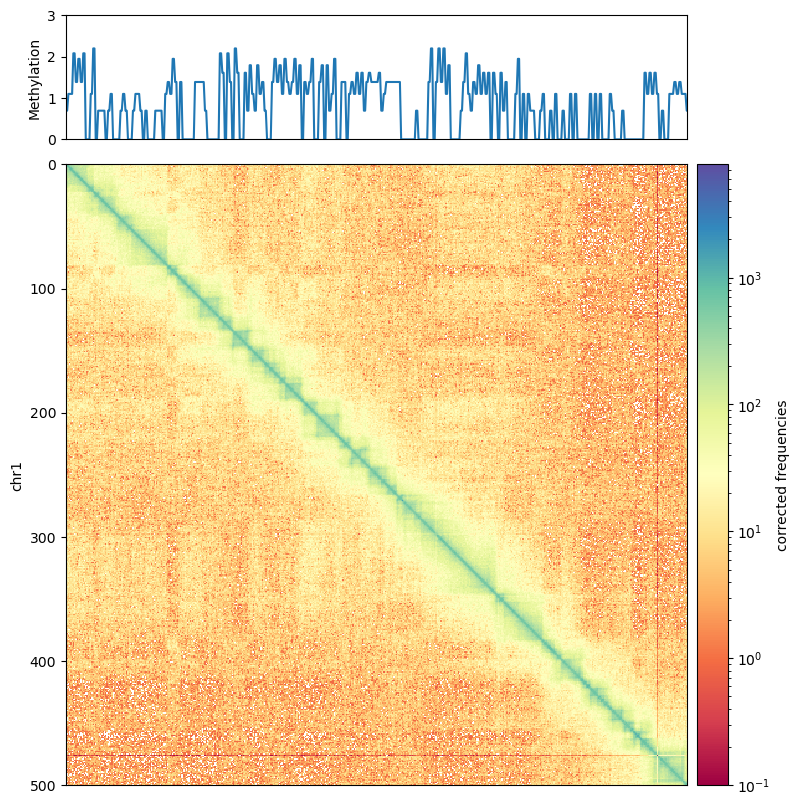

In [51]:
#Plotting it again but without the 0 to 1 scale
#plotting from position 30000000, till the end
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import cooler
import bioframe

# Load HiC data
#merge = cooler.Cooler('/data/processing2/erikson_pipegrp/methylation/chr1.normRnage0_1.cool')
merge = cooler.Cooler('/data/processing2/erikson_pipegrp/methylation/chr1.balanced.cool')

bins = merge.bins()[:]
mm38_genome = bioframe.load_fasta('/data/repository/organisms/GRCm38_ensembl/genome_fasta/genome.fa')
gc_cov = bioframe.frac_gc(bins[['chrom', 'start', 'end']], mm38_genome)

# Load methylation data from BED file
methylation_data = pd.read_csv('/data/processing2/erikson_pipegrp/methylation/modkit/23L004743_CaBl_Ori_NPCs_Control_rep2.callmods.pileup.scores.chr1.bed', sep='\t', header=None, names=['chrom', 'start', 'end', 'methylation_value'])
methylation_data['methylation_value'] = pd.to_numeric(methylation_data['methylation_value'], errors='coerce')

# Filter methylation data to start from position 3000826
methylation_data = methylation_data[methylation_data['start'] >= 3000826]

# Log transform methylation values
log_transformed_values = np.log(methylation_data['methylation_value'])
methylation_data['methylation_value'] = log_transformed_values

# Plotting
f, ax = plt.subplots(figsize=(15, 10))
norm = LogNorm(vmin=1e-1)

# Fetch HiC data starting from position 3000826
im = ax.matshow(
    merge.matrix().fetch('1:3000000-195000000'),  # Adjust the range as needed
    norm=norm,
    cmap='Spectral'
)
plt.axis([0, 500, 500, 0])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
weights = merge.bins().fetch('1:3000000-195000000')[:]['weight'].values
plt.colorbar(im, cax=cax, label='corrected frequencies')
ax.set_ylabel('chr1')
ax.xaxis.set_visible(False)

# Align the methylation plot with the heatmap
ax1 = divider.append_axes("top", size="20%", pad=0.25, sharex=ax)
ax1.plot(methylation_data['methylation_value'], label='Methylation')
ax1.set_ylim(0, 3)
ax1.set_ylabel('Methylation')
ax1.set_xticks([])

f.savefig('/home/erikson/PythonCode/PoreC/FINAL_QC_compartments_chr1_ge_withInsulationMethylation_v5.png', dpi=300)

In [36]:
#Plotting it again but without the 0 to 1 scale
#plotting from position 30000000, till the end, add the lines things
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import cooler
import bioframe

# Load HiC data
#merge = cooler.Cooler('/data/processing2/erikson_pipegrp/methylation/chr1.normRnage0_1.cool')
merge = cooler.Cooler('/data/processing2/erikson_pipegrp/methylation/chr1.balanced.cool')

bins = merge.bins()[:]
mm38_genome = bioframe.load_fasta('/data/repository/organisms/GRCm38_ensembl/genome_fasta/genome.fa')
gc_cov = bioframe.frac_gc(bins[['chrom', 'start', 'end']], mm38_genome)

# Load methylation data from BED file
methylation_data = pd.read_csv('/data/processing2/erikson_pipegrp/methylation/modkit/23L004743_CaBl_Ori_NPCs_Control_rep2.callmods.pileup.scores.chr1.bed', sep='\t', header=None, names=['chrom', 'start', 'end', 'methylation_value'])
methylation_data['methylation_value'] = pd.to_numeric(methylation_data['methylation_value'], errors='coerce')

# Filter methylation data to start from position 3000826
methylation_data = methylation_data[methylation_data['start'] >= 3000826]

# Log transform methylation values
log_transformed_values = np.log(methylation_data['methylation_value'])
methylation_data['methylation_value'] = log_transformed_values

# Plotting
f, ax = plt.subplots(figsize=(15, 10))
norm = LogNorm(vmin=1e-1)

# Fetch HiC data starting from position 3000826
im = ax.matshow(
    merge.matrix().fetch('1:3000826-195000000'),  # Adjust the range as needed
    norm=norm,
    cmap='Spectral'
)
#plt.axis([0, 500, 500, 0])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='corrected frequencies')
ax.set_ylabel('chr1')
ax.xaxis.set_visible(False)

# Align the methylation plot with the heatmap
ax1 = divider.append_axes("top", size="20%", pad=0.25, sharex=ax)
ax1.plot(methylation_data['methylation_value'], label='Methylation')
ax1.set_ylim(0, 3)
ax1.set_ylabel('Methylation')
ax1.set_xticks([])


f.savefig('/home/erikson/PythonCode/PoreC/FINAL_QC_compartments_chr1_ge_withInsulationMethylation_v6.png', dpi=300)

Error in callback <function flush_figures at 0x7fc44dac6340> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [37]:
#adding the data first
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import cooler
import bioframe

# Load HiC data
#merge = cooler.Cooler('/data/processing2/erikson_pipegrp/methylation/chr1.normRnage0_1.cool')
merge = cooler.Cooler('/data/processing2/erikson_pipegrp/methylation/chr1.balanced.cool')

bins = merge.bins()[:]
mm38_genome = bioframe.load_fasta('/data/repository/organisms/GRCm38_ensembl/genome_fasta/genome.fa')
gc_cov = bioframe.frac_gc(bins[['chrom', 'start', 'end']], mm38_genome)

# Load methylation data from BED file
methylation_data = pd.read_csv('/data/processing2/erikson_pipegrp/methylation/modkit/23L004743_CaBl_Ori_NPCs_Control_rep2.callmods.pileup.scores.chr1.bed', sep='\t', header=None, names=['chrom', 'start', 'end', 'methylation_value'])
methylation_data['methylation_value'] = pd.to_numeric(methylation_data['methylation_value'], errors='coerce')

# Filter methylation data to start from position 3000826
methylation_data = methylation_data[methylation_data['start'] >= 3000826]

# Log transform methylation values
log_transformed_values = np.log(methylation_data['methylation_value'])
methylation_data['methylation_value'] = log_transformed_values


In [38]:
gc_cov.head()

chrom   start     end  GC
0     1       0   80000 NaN
1     1   80000  160000 NaN
2     1  160000  240000 NaN
3     1  240000  320000 NaN
4     1  320000  400000 NaN

In [39]:
view_df = pd.DataFrame(
    {
        'chrom': merge.chromnames,
        'start': 0,
        'end': merge.chromsizes.values,
        'name': merge.chromnames
    }
)
view_df.head()

chrom  start        end name
0     1      0  195471971    1
1    10      0  130694993   10
2    11      0  122082543   11
3    12      0  120129022   12
4    13      0  120421639   13

In [40]:
cis_eigs = cooltools.eigs_cis(
    merge,
    gc_cov,
    view_df,
    n_eigs=3
)
eigenvector_track = cis_eigs[1][['chrom','start','end','E1']]

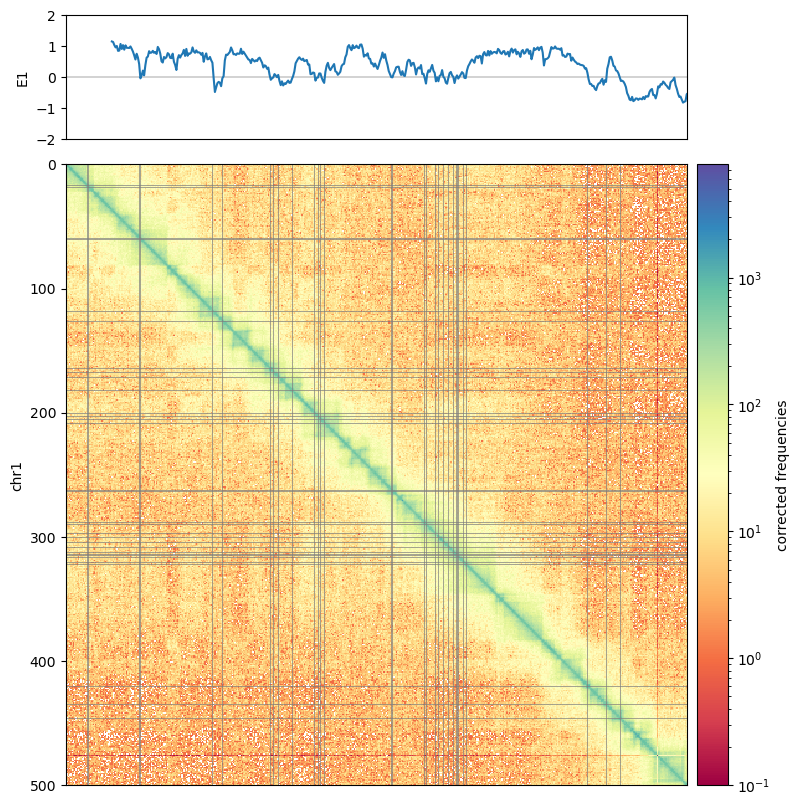

In [43]:
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

cis_eigs = cooltools.eigs_cis(
    merge,
    gc_cov,
    view_df,
    n_eigs=3
)

eigenvector_track = cis_eigs[1][['chrom','start','end','E1']]
f, ax = plt.subplots(
    figsize=(15, 10),
)

norm = LogNorm(vmin=1e-1)

im = ax.matshow(
    merge.matrix().fetch('1:3000826-195000000'),
    norm=norm,
    cmap='Spectral'
);
plt.axis([0,500,500,0])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='corrected frequencies');
ax.set_ylabel('chr1')
ax.xaxis.set_visible(False)

ax1 = divider.append_axes("top", size="20%", pad=0.25, sharex=ax)
weights = merge.bins().fetch('3')[:]['weight'].values
ax1.plot([0,500],[0,0],'k',lw=0.25)
ax1.plot( -eigenvector_track['E1'].values, label='E1')
ax1.set_ylim(-2,2)

ax1.set_ylabel('E1')
ax1.set_xticks([]);


for i in np.where(np.diff( (cis_eigs[1]['E1']>0).astype(int)))[0]:
    ax.plot([0, 500],[i,i],'#7f7f7f',lw=0.5)
    ax.plot([i,i],[0, 500],'#7f7f7f',lw=0.5)

f.savefig('FINAL_QC_compartments_chr1_ge_withInsulationScores.png', dpi=300)

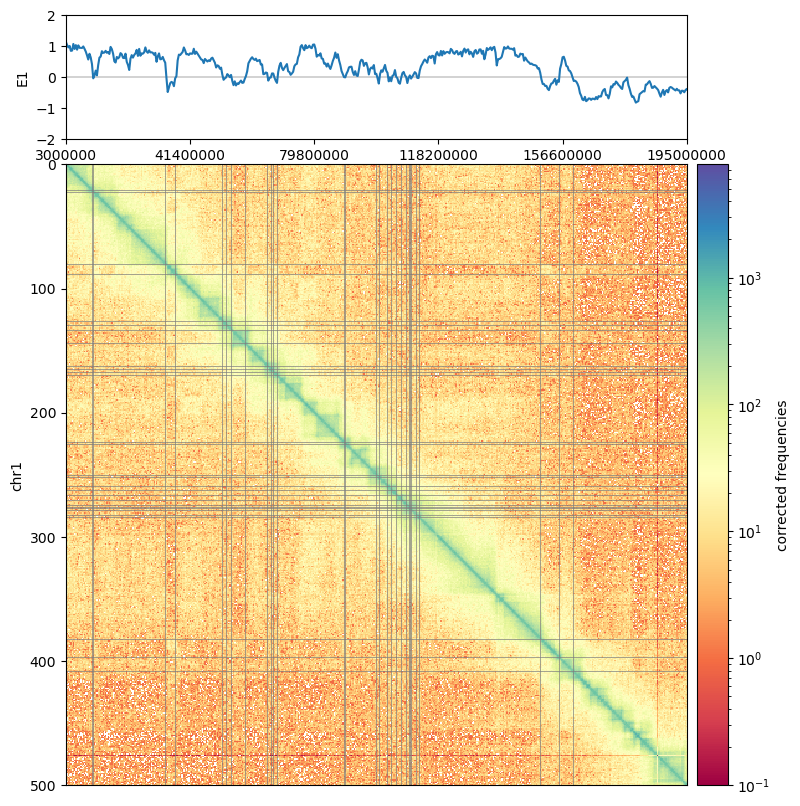

In [50]:
#Will this be better
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import numpy as np

# Assuming merge, gc_cov, view_df are defined elsewhere
cis_eigs = cooltools.eigs_cis(
    merge,
    gc_cov,
    view_df,
    n_eigs=3
)

# Fetch the specific region for eigenvector track
eigenvector_track = cis_eigs[1][['chrom','start','end','E1']]
region_start, region_end = 3000000, 195000000
eigenvector_track = eigenvector_track[(eigenvector_track['start'] >= region_start) & (eigenvector_track['end'] <= region_end)]

f, ax = plt.subplots(
    figsize=(15, 10),
)

norm = LogNorm(vmin=1e-1)

im = ax.matshow(
    merge.matrix().fetch('1:3000000-195000000'),
    norm=norm,
    cmap='Spectral'
)
plt.axis([0,500,500,0])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='corrected frequencies')
ax.set_ylabel('chr1')
ax.xaxis.set_visible(False)

ax1 = divider.append_axes("top", size="20%", pad=0.25, sharex=ax)
weights = merge.bins().fetch('1:3000000-195000000')[:]['weight'].values
ax1.plot([0,500],[0,0],'k',lw=0.25)
ax1.plot(-eigenvector_track['E1'].values, label='E1')
ax1.set_ylim(-2,2)

# Remove Y-axis labels
ax1.set_ylabel('E1')
ax1.set_xticks([]);


# Set X-axis labels to chromosome coordinates
ax1.set_xticks(np.linspace(0, 500, num=6))
ax1.set_xticklabels(np.linspace(region_start, region_end, num=6, dtype=int))

for i in np.where(np.diff((eigenvector_track['E1'] > 0).astype(int)))[0]:
    ax.plot([0, 500], [i, i], '#7f7f7f', lw=0.5)
    ax.plot([i, i], [0, 500], '#7f7f7f', lw=0.5)

f.savefig('FINAL_QC_compartments_chr1_ge_withInsulationScores_v2.png', dpi=300)

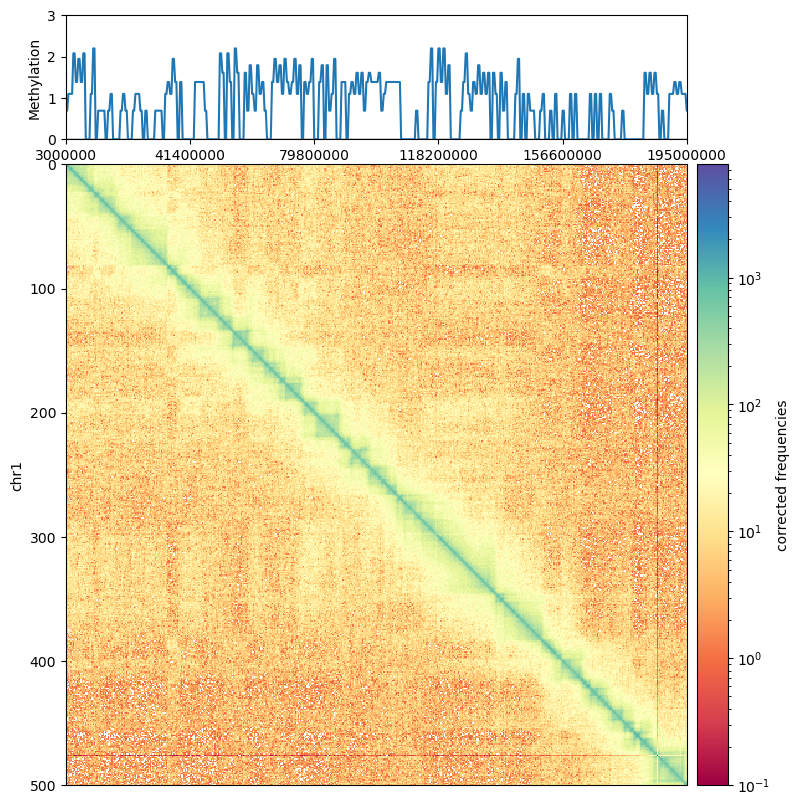

In [52]:
#Will this be better
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import numpy as np


f, ax = plt.subplots(
    figsize=(15, 10),
)

norm = LogNorm(vmin=1e-1)

im = ax.matshow(
    merge.matrix().fetch('1:3000000-195000000'),
    norm=norm,
    cmap='Spectral'
)
plt.axis([0,500,500,0])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='corrected frequencies')
ax.set_ylabel('chr1')
ax.xaxis.set_visible(False)

ax1 = divider.append_axes("top", size="20%", pad=0.25, sharex=ax)
weights = merge.bins().fetch('1:3000000-195000000')[:]['weight'].values
ax1.plot([0,500],[0,0],'k',lw=0.25)
ax1.plot(methylation_data['methylation_value'], label='Methylation')
ax1.set_ylim(0,3)
ax1.set_ylabel('Methylation')


# Set X-axis labels to chromosome coordinates
#ax1.set_xticks(np.linspace(0, 500, num=6))
ax1.set_xticklabels(np.linspace(region_start, region_end, num=6, dtype=int))


f.savefig('FINAL_QC_compartments_chr1_ge_withMethylation_v2.png', dpi=300)